# PROJECT: 
### TMDb movie data

# INTRODUCTION: 
This  data  set  contains  information about  10,000  movies collected  from The Movie Database (TMDb), including  user  ratings  and  revenue. 

•  Certain  columns,  like  ‘cast’ and ‘genres’,  contain  multiple values  separated  by  pipe  ( |) characters.

•  There  are  some odd characters in  the  ‘cast’  column.  Don’t  worry about  cleaning  them.  You can leave  them as is. 

•  The final  two  columns ending with  “ _adj”  show the budget and revenue  of  the  associated  movie in  terms  of  2010 dollars, accounting  for  inflation  over time.

# QUESTION(S) FOR ANALYSIS:

• Number of rows in the dataset

• Number of columns in the dataset

• Which genres are most popular from year to year? 

• What kinds of properties associated with movies that have high revenue.


# DATA WRANGLING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
tmdb_movies = pd.read_csv("TMDb_movie_data.csv")
tmdb_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Check for the number of duplicates that exists in the dataset.

In [3]:
tmdb_movies.duplicated().sum()

1

### Check the row with duplicate values

In [4]:
tmdb_movies[tmdb_movies.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


### • Number of rows

In [5]:
tmdb_movies.shape[0]

10866

### • Number of columns

In [6]:
tmdb_movies.shape[1]

21

### • List of columns

In [7]:
tmdb_movies.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

### The columns with their numbers of non null and their data types.

In [8]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Columns with their numbers of null values

In [9]:
tmdb_movies.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [10]:
tmdb_movies[tmdb_movies.isna() == False]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


### Visualization of columns containing null values and their Frequencies.

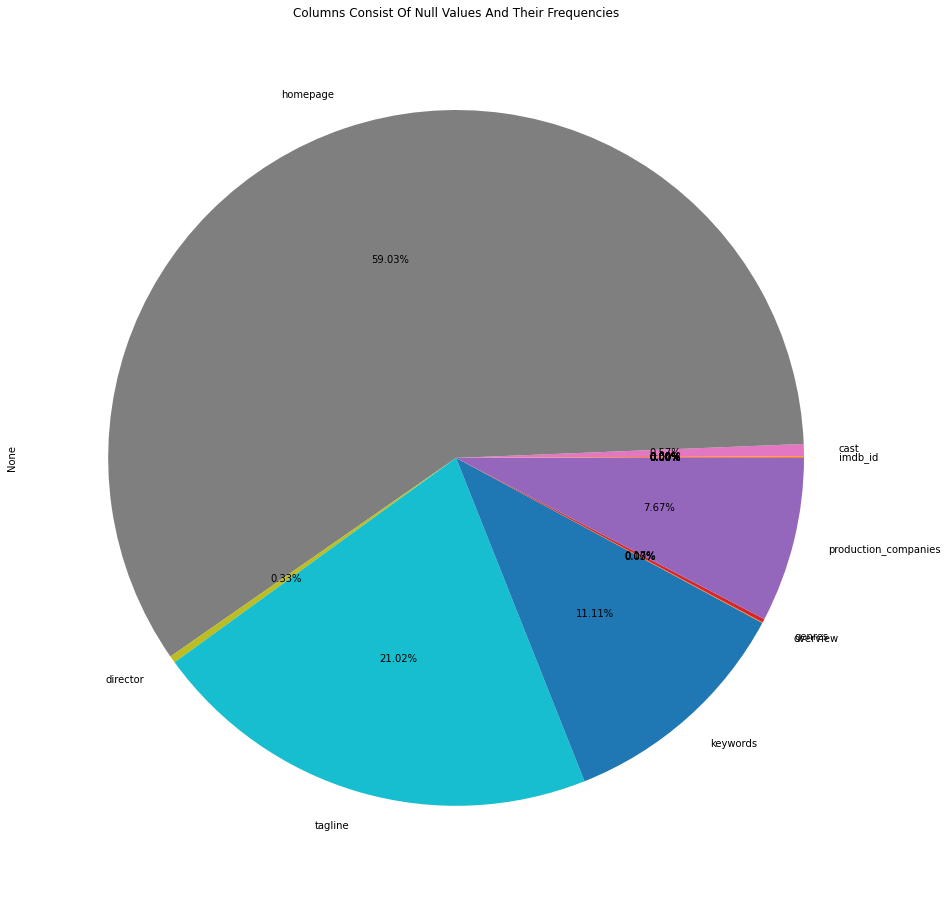

In [12]:
tmdb_movies.isna().sum().plot(kind = 'pie', figsize = (20,16), autopct = '%.2f%%');
plt.title("Columns consist of null values and their Frequencies".title());

The visualization above indicated that the homepage column contains the most null values.

# DATA CLEANING

### • Drop rows containing null values

In [13]:
clean_data = tmdb_movies.dropna(axis= 0)

### Explore the data after cleaning

In [14]:
clean_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.9/site-packages/matplotlib/bezier.py:216: RuntimeWarning: divide by zero encountered in power
  return (np.power.outer(1 - t, self._orders[::-1])
/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.9/site-packages/matplotlib/bezier.py:217: RuntimeWarning: divide by zero encountered in power
  * np.power.outer(t, self._orders)) @ self._px


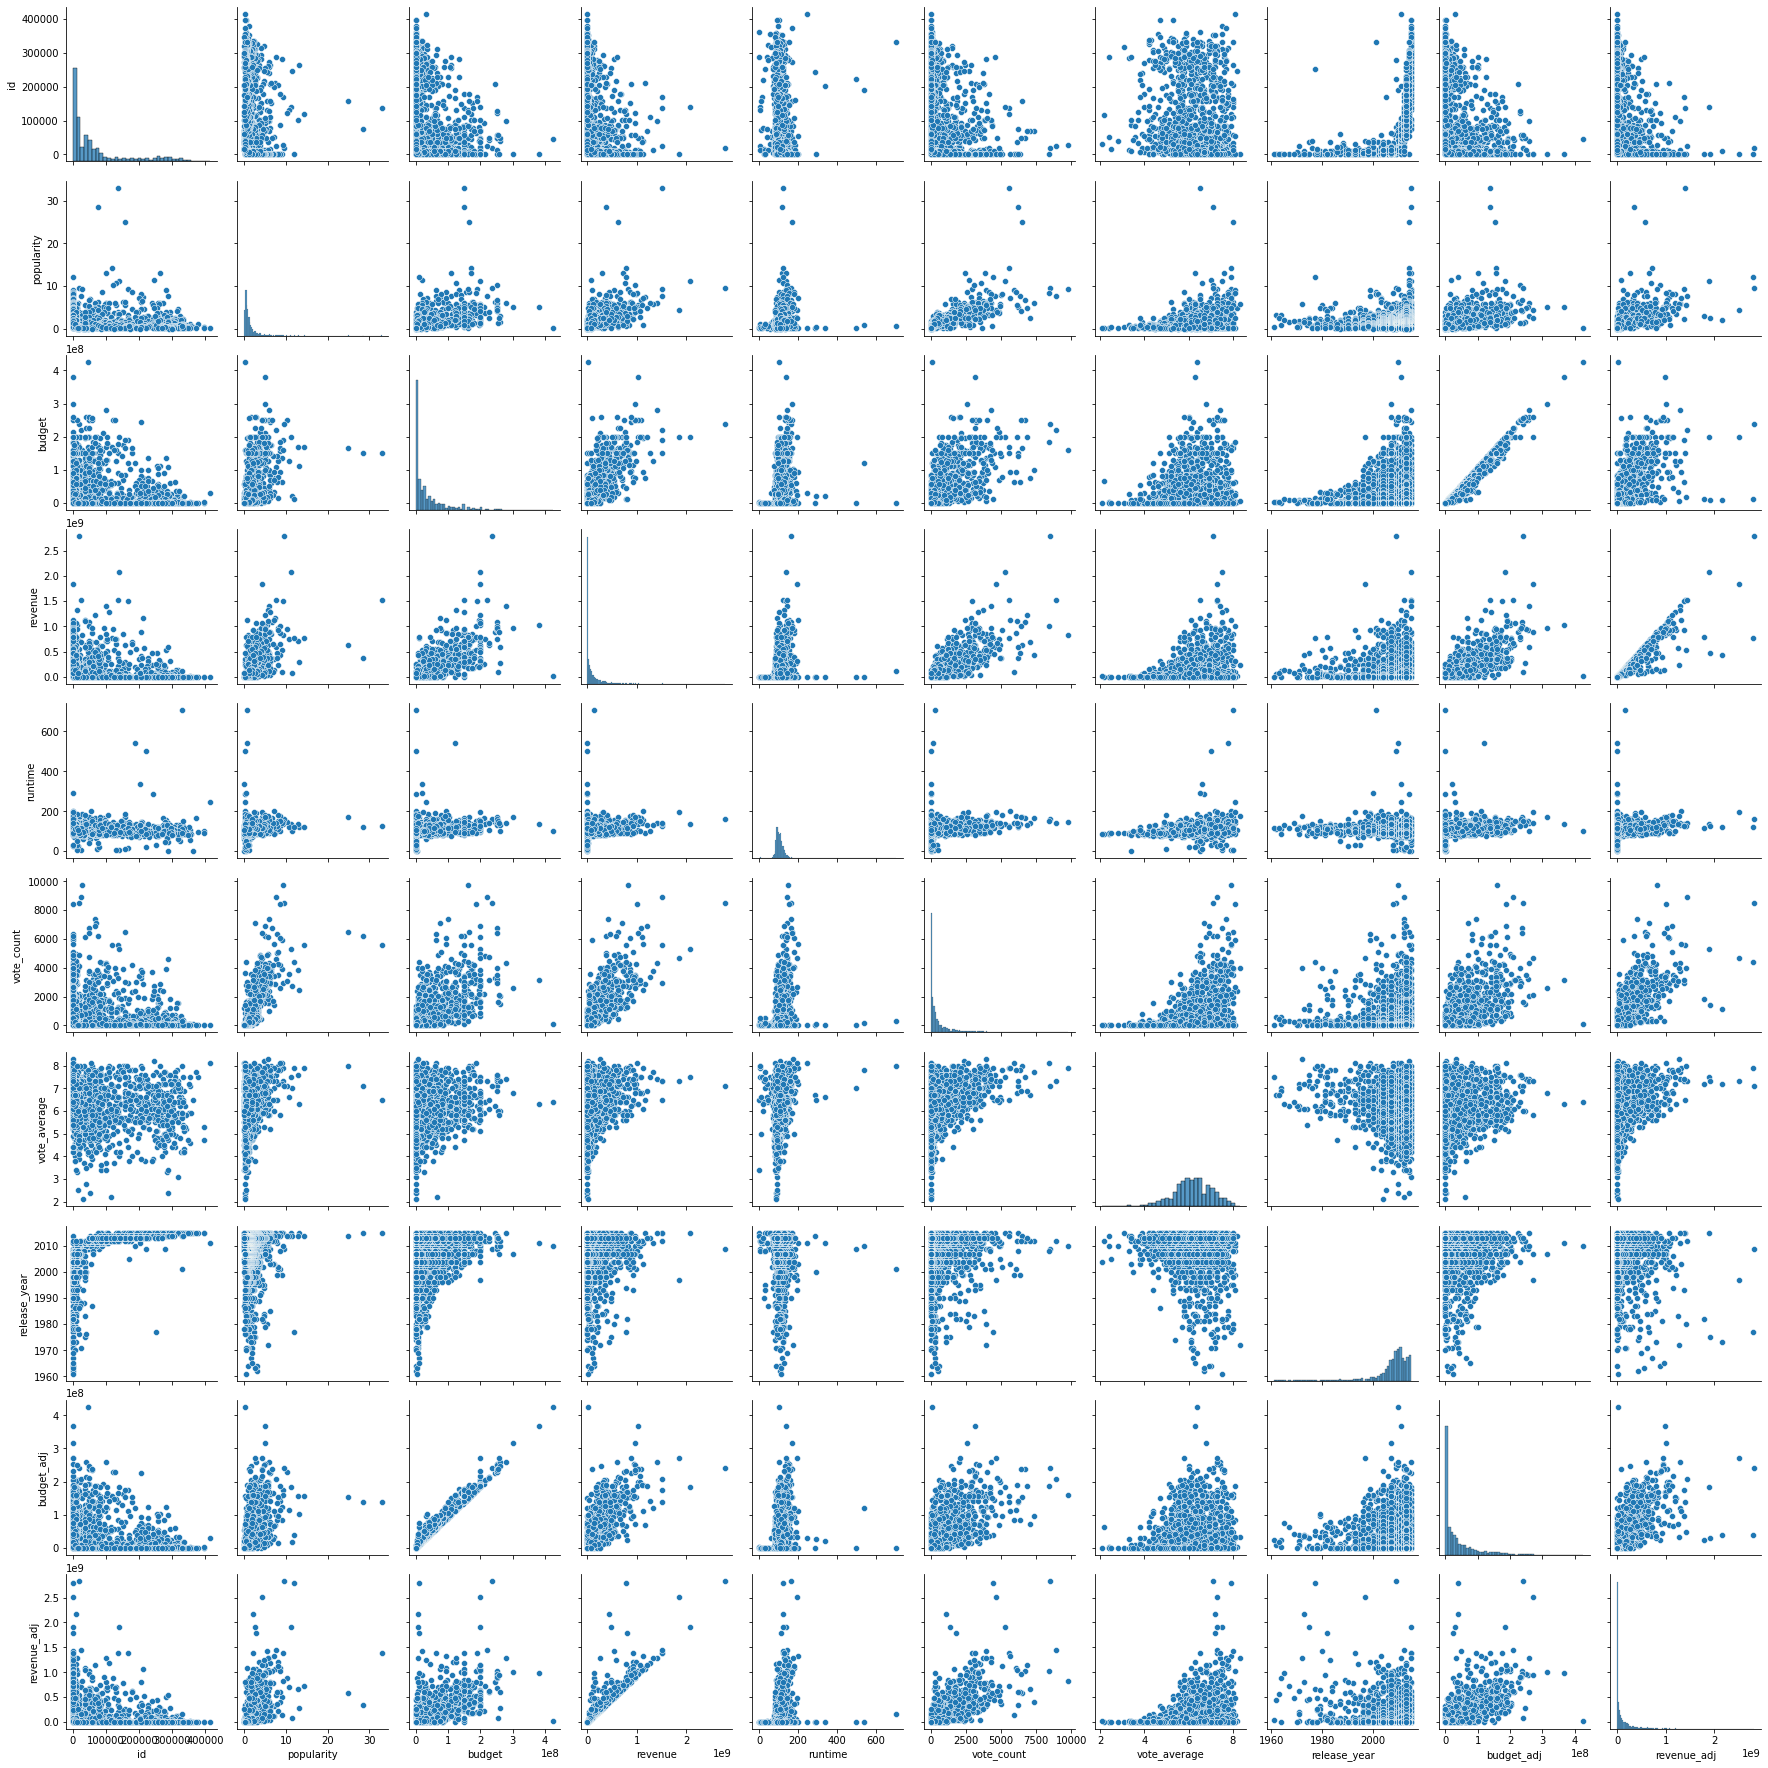

In [39]:
sns.pairplot(clean_data);

### Check if there's duplicate values after cleaning.

In [15]:
clean_data.duplicated().sum()

0

### Number of rows after cleaning.

In [16]:
clean_data.shape[0]

1992

### Splitting the genres by pipe character (|) contain  in the genres column.

In [17]:
clean_data.genres.str.split('|', expand = False)

0        [Action, Adventure, Science Fiction, Thriller]
1        [Action, Adventure, Science Fiction, Thriller]
2                [Adventure, Science Fiction, Thriller]
3         [Action, Adventure, Science Fiction, Fantasy]
4                             [Action, Crime, Thriller]
                              ...                      
10724                     [Adventure, Action, Thriller]
10759                                [Horror, Thriller]
10760                                          [Comedy]
10817                              [Documentary, Music]
10819                                  [Action, Comedy]
Name: genres, Length: 1992, dtype: object

### Which genres are most popular from year to year?

In [20]:
years = set(np.array(clean_data["release_year"]))
for year in years:
    genres = clean_data.query(f"release_year == {year}")["genres"]
    genres = genres.apply(lambda x: x.split('|'))
    arr = np.array([])
    for genre in genres:
        arr = np.append(arr, genre)
        df = pd.DataFrame(arr)
    print(year, df.value_counts(), sep = '\n', end = '\n\n')
    

1961
Comedy    1
Family    1
dtype: int64

1962
Action       1
Adventure    1
Thriller     1
dtype: int64

1963
Action       1
Adventure    1
Thriller     1
dtype: int64

1964
Action       1
Adventure    1
Comedy       1
Music        1
Thriller     1
dtype: int64

1965
Action       1
Adventure    1
Thriller     1
dtype: int64

1967
Action       1
Adventure    1
Thriller     1
dtype: int64

1969
Action       1
Adventure    1
Thriller     1
dtype: int64

1970
Comedy      1
Drama       1
Thriller    1
dtype: int64

1971
Thriller           3
Action             2
Drama              2
Science Fiction    2
Adventure          1
Crime              1
Mystery            1
dtype: int64

1972
Crime    1
Drama    1
dtype: int64

1973
Thriller     2
Action       1
Adventure    1
Drama        1
Horror       1
dtype: int64

1974
Action             1
Adventure          1
Comedy             1
Science Fiction    1
Thriller           1
dtype: int64

1975
Adventure          2
Comedy             2
Horror    

2006
Drama              48
Comedy             35
Thriller           29
Romance            17
Action             15
Adventure          15
Crime              13
Family             12
Fantasy            12
Horror             12
Mystery            11
Animation           8
Science Fiction     7
Documentary         4
History             3
War                 3
Music               2
TV Movie            1
dtype: int64

2007
Drama              64
Comedy             47
Thriller           40
Action             28
Crime              24
Romance            22
Adventure          22
Horror             22
Family             18
Fantasy            17
Mystery            15
Science Fiction    13
Animation          11
Music               7
History             3
Foreign             2
Documentary         2
Western             2
TV Movie            1
War                 1
dtype: int64

2008
Drama              59
Comedy             53
Action             38
Thriller           32
Adventure          25
Romance    

### Visualization of the most popular genres from year to year.

Text(0, 0.5, 'Frequecy')

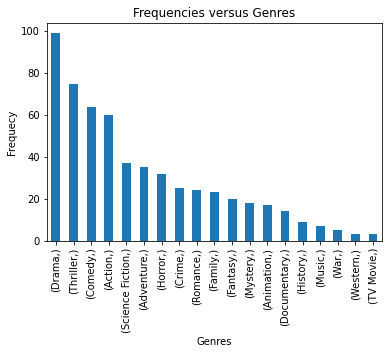

In [21]:
years = set(np.array(clean_data["release_year"]))
for year in years:
    genres = clean_data.query(f"release_year == {year}")["genres"]
    genres = genres.apply(lambda x: x.split('|'))
    arr = np.array([])
    for genre in genres:
        arr = np.append(arr, genre)
        df = pd.DataFrame(arr)
    df.value_counts().plot(kind = 'bar')
plt.title("Frequencies versus Genres")
plt.xlabel("Genres")
plt.ylabel("Frequecy")

•The graph indicated that DRAMA is the most popular genre from year to year.

### What kinds of properties associated with movies that have high revenues?

#### High revenue

In [22]:
clean_data.revenue.max()

2781505847

In [23]:
clean_data[clean_data.revenue == 2781505847]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09


### Visualization of properties associated with movies that have high revenue.

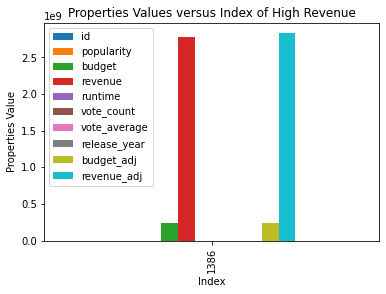

In [24]:
clean_data[clean_data.revenue == 2781505847].plot(kind = 'bar');
plt.title("Properties Values versus Index of High Revenue")
plt.xlabel("Index")
plt.ylabel("Properties Value")
plt.show()

In [27]:
clean_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1992.000000,1992.000000,1.992000e+03,1.992000e+03,1992.000000,1992.000000,1992.000000,1992.000000,1.992000e+03,1.992000e+03
mean,71652.152108,1.316763,3.454924e+07,1.152153e+08,106.040161,643.616968,6.178614,2007.796687,3.627376e+07,1.302391e+08
std,92355.883915,1.873563,5.061878e+07,2.202887e+08,29.234592,1092.355998,0.881955,7.549224,5.129783e+07,2.564338e+08
min,11.000000,0.000620,0.000000e+00,0.000000e+00,0.000000,10.000000,2.100000,1961.000000,0.000000e+00,0.000000e+00
25%,9699.000000,0.384079,0.000000e+00,0.000000e+00,92.000000,51.000000,5.600000,2006.000000,0.000000e+00,0.000000e+00
50%,35112.500000,0.774223,1.500000e+07,2.578782e+07,102.000000,210.000000,6.200000,2010.000000,1.524601e+07,2.806370e+07
75%,83573.000000,1.538639,4.800000e+07,1.278787e+08,116.000000,688.250000,6.800000,2012.000000,5.064450e+07,1.393645e+08
max,414419.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.300000,2015.000000,4.250000e+08,2.827124e+09


In [28]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1992 non-null   int64  
 1   imdb_id               1992 non-null   object 
 2   popularity            1992 non-null   float64
 3   budget                1992 non-null   int64  
 4   revenue               1992 non-null   int64  
 5   original_title        1992 non-null   object 
 6   cast                  1992 non-null   object 
 7   homepage              1992 non-null   object 
 8   director              1992 non-null   object 
 9   tagline               1992 non-null   object 
 10  keywords              1992 non-null   object 
 11  overview              1992 non-null   object 
 12  runtime               1992 non-null   int64  
 13  genres                1992 non-null   object 
 14  production_companies  1992 non-null   object 
 15  release_date        

The above information shows that there's neither duplicate values nor the null values in the clean dataset.

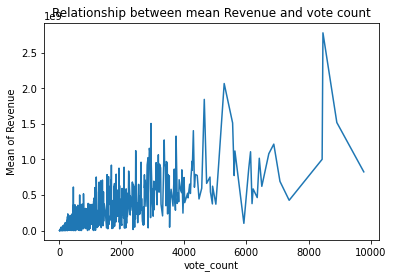

In [30]:
clean_data.groupby("vote_count")["revenue"].aggregate("mean").plot();
plt.title("Relationship between mean Revenue and vote count")
plt.ylabel("Mean of Revenue")
plt.show()

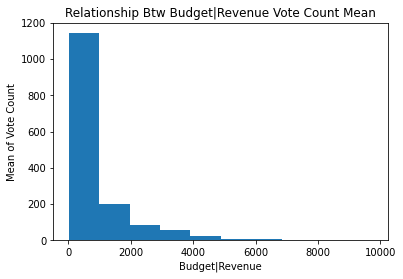

In [32]:
clean_data.groupby(["budget", "revenue"])["vote_count"].mean().plot(kind = 'hist')
plt.title("Relationship btw Budget|Revenue vote count mean".title())
plt.xlabel("Budget|Revenue")
plt.ylabel("Mean of Vote Count")
plt.show()

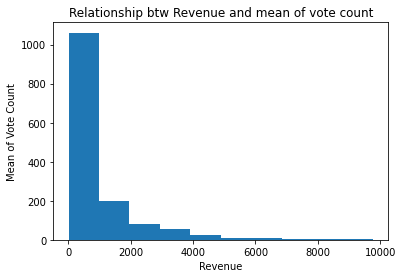

In [37]:
def plot_chart(x, a, b,c ):
    output = plt.hist(x);
    plt.title(a)
    plt.xlabel(b)
    plt.ylabel(c)
    return output;
plot_chart(clean_data.groupby("revenue")["vote_count"].mean(), "Relationship btw Revenue and mean of vote count", "Revenue", "Mean of Vote Count")
plt.show()

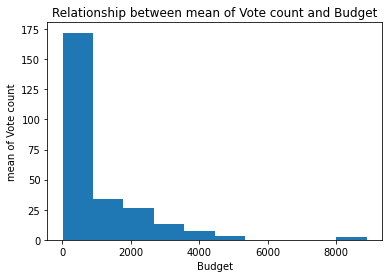

In [38]:
plot_chart(clean_data.groupby("budget")["vote_count"].mean(), "Relationship between mean of Vote count and Budget", "Budget", "mean of Vote count")
plt.show()

# CONCLUSION:

### Results from the dataset:
     
• The dataset before dropping the rows of null values consist of 10866 rows and 21 columns and it reduces to 1992 rows after dropping the rows.
       
• It was found that Drama is the most popular genre among others from year to year.
       
• It was deduced that in 2009, highest revenue was generated and many properties were associated with it including the combination of 4 genres.
       
• It was noted that the revenue generated depends on the number of vote.
       
### Limitations from the dataset:
• The number of rows that consist of null values is very high.